In [15]:
import cv2 #importing opencv
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('myimg.jpg') #reading image
cv2.imshow('image',img) #showing image
cv2.waitKey(5000)   #window will show image for 1sec
cv2.destroyAllWindows() #destroys all windows

#citation:geeksforgeeks

In [ ]:
print(img.shape) #shape of image shape
height = img.shape[0]  
width = img.shape[1]

In [ ]:
img.size #size of image

In [ ]:
for i in range (123,133):     
    for j in range (356,366):
        print(img[i][j])      #pixel intensities in square block from (123,356) to 133,366) 
#origin of image is at (0,0)

#citation: stackoverflow

In [ ]:
for i in range (345,445):
    for j in range (120,220):
        img[i][j]=[255,255,255] #setting the values to 255 and expecting a white patch of 100x100 pixels in image
cv2.imshow("newimg",img)
cv2.waitKey(0)
cv2.destroyAllWindows() #a white square of 100x100 pixels is showing in modified image

In [ ]:
for i in range (545,645):
    for j in range (320,420):
        img[i][j]=[256,256,256] #setting the values to 256
cv2.imshow("newimg2",img)
cv2.waitKey(0)
cv2.destroyAllWindows() #a black square of 100x100 pixels is showing in modified image
#it means the intensity above 255 is taken modulus with 256 

In [ ]:
cropped_img = img[100:height-100][100:width-100].copy() #cropped image by reducing pixels from borders
cv2.imshow("cropped image",cropped_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()  
cv2.imwrite("croppedimg.png",cropped_img) #saved the cropped image named croppedimg with .png extension

#citation: geeksforgeeks

In [ ]:
changedimg=img.copy()
for i in range (0,height):
    for j in range (0,width):
        for k in range (0,3):
            changedimg[i][j][k] += 50  #adding 50 to each channel of a pixel
cv2.imshow("newimage3",changedimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
#in the image the brightness of all parts is increased and where the brightness was more it is taken back to low brightness(grey)

In [ ]:
mirror_image = img.copy()
for i in range (0,int(height/2)):
    for j in range (0,width):
        mirror_image[i][j]=img[height-1-i][j]  #the upper part is replaced with lower and lower is replaced with upper part
        mirror_image[height-1-i][j]=img[i][j]  
cv2.imshow("mirrored image",mirror_image) 
cv2.waitKey(0)
cv2.destroyAllWindows()
# the image is mirrored w.r.t. x-axis by inverting y-axis

<BarContainer object of 256 artists>

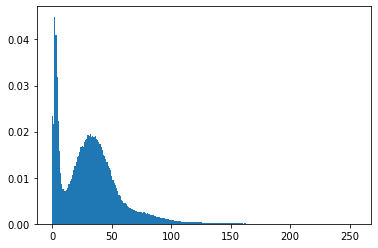

In [16]:
nightimg = cv2.imread("night_img.jpg",0)  #0 for taking image as black-white #citation: aksh garg
cv2.imshow("grey image",nightimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
histogram=[]   #creating histogram arr
x_array=[]    #creating index arr
for i in range (0,256):   #making each ele of histogram to 0 and x_array to index
    histogram.append(0)
    x_array.append(i)
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        histogram[nightimg[i][j]] += 1  #counting no of pixels with given intensity
for i in range (0,256):
    histogram[i] /= nightimg.size  #taking average

plt.bar(x_array,histogram,width=1) #plotting histogram using matplotlib

#citation: geeksforgeeks

In [ ]:
nightimg_1 = nightimg.copy()
nightimg_1 *= 2   #multiplying each pixel with a=2
cv2.imshow("grey image",nightimg_1)  #a=2 gives the best possible output
cv2.waitKey(0)
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

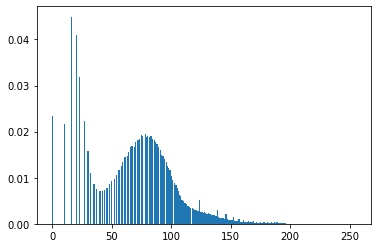

In [4]:
nightimg_2 = nightimg.copy()
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        nightimg_2[i][j] = int(255*(nightimg_2[i][j]/255)**0.57)  # s = c*r^y 
#after trying different values of y, y = 0.57 looks more enhanced (acc to me)
cv2.imshow("grey image",nightimg_2) 
cv2.waitKey(0)
cv2.destroyAllWindows()
histogram=[]   #creating histogram arr
x_array=[]    #creating index arr
for i in range (0,256):   #making each ele of histogram to 0 and x_array to index
    histogram.append(0)
    x_array.append(i)
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        histogram[nightimg_2[i][j]] += 1  #counting no of pixels with given intensity
for i in range (0,256):
    histogram[i] /= nightimg.size  #taking average

plt.bar(x_array,histogram,width=1)

<BarContainer object of 256 artists>

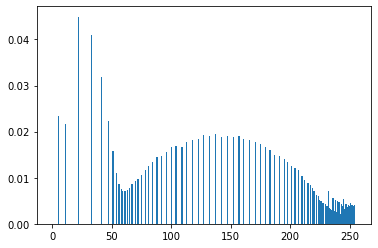

In [3]:
cdf = []
cdf.append(histogram[0])
for i in range (1,256):
    cdf.append(histogram[i]+cdf[i-1])
for i in range (0,nightimg.shape[0]):
    for j in range(0,nightimg.shape[1]):
        nightimg[i][j] = (cdf[nightimg[i][j]]*255)
cv2.imshow("grey image",nightimg) 
cv2.waitKey(0)
cv2.destroyAllWindows()
histogram=[]   #creating histogram arr
x_array=[]    #creating index arr
for i in range (0,256):   #making each ele of histogram to 0 and x_array to index
    histogram.append(0)
    x_array.append(i)
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        histogram[nightimg[i][j]] += 1  #counting no of pixels with given intensity
for i in range (0,256):
    histogram[i] /= nightimg.size  #taking average

plt.bar(x_array,histogram,width=1)    


<BarContainer object of 256 artists>

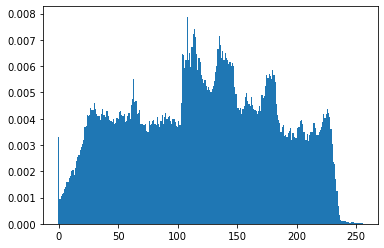

In [19]:
img2=cv2.imread("sample-img.jpg",0)  #getting a reference image for histogram matching as greyscale one
cv2.imshow("grey image",img2) 
cv2.waitKey(0)
cv2.destroyAllWindows()
#showing the ref image
histogram=[]   #creating histogram arr
x_array=[]    #creating index arr
for i in range (0,256):   
    histogram.append(0)
    x_array.append(i)
for i in range (0,img2.shape[0]):
    for j in range (0,img2.shape[1]):
        histogram[img2[i][j]] += 1  
for i in range (0,256):
    histogram[i] /= img2.size
plt.bar(x_array,histogram,width=1)    
#plotting the histogram of reference image

<BarContainer object of 512 artists>

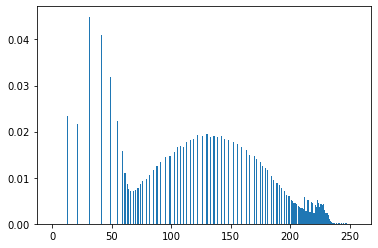

In [20]:
#citation:scikit-image.org
from skimage import exposure
matched = exposure.match_histograms(nightimg,img2)  #using library function to match the histograms
matched=matched.astype(np.uint8) #converting the float values to uint8
cv2.imshow("matched image",matched) 
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range (0,256):   
    histogram.append(0)
    x_array.append(i)
for i in range (0,matched.shape[0]):
    for j in range (0,matched.shape[1]):
        histogram[matched[i][j]] += 1  
for i in range (0,256):
    histogram[i] /= matched.size
plt.bar(x_array,histogram,width=1) 
#plotting the histogram after matching
#the reference histogram and imag